In [4]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-7build1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


In [13]:
import os

seven_zip_file_path = "/kaggle/input/kkbox-music-recommendation-challenge/members.csv.7z"

extract_dir = "/kaggle/working/"
os.makedirs(extract_dir, exist_ok=True)

In [14]:
!7z x $seven_zip_file_path -o$extract_dir


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C,Utf16=off,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/kkbox-music-recommendation-challenge                                                            1 file, 1349856 bytes (1319 KiB)

Extracting archive: /kaggle/input/kkbox-music-recommendation-challenge/members.csv.7z
--
Path = /kaggle/input/kkbox-music-recommendation-challenge/members.csv.7z
Type = 7z
Physical Size = 1349856
Headers Size = 130
Method = LZMA2:3m
Solid = -
Blocks = 1

    Everything is Ok

Size:       2503827
Compressed: 1349856


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df_train = pd.read_csv('/kaggle/working/train.csv')
df_test = pd.read_csv('/kaggle/working/test.csv')
df_songs = pd.read_csv('/kaggle/working/songs.csv')
df_song_extra = pd.read_csv('/kaggle/working/song_extra_info.csv')
df_members = pd.read_csv('/kaggle/working/members.csv')

#Exploratory Data Analysis

In [16]:
df_train.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [18]:
df_train['target'].value_counts()

target
1    3714656
0    3662762
Name: count, dtype: int64

In [19]:
df_songs.head(3)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0


In [20]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [21]:
df_songs['language'].value_counts()

language
 52.0    1336694
-1.0      639467
 3.0      106295
 17.0      92518
 24.0      41744
 31.0      39201
 10.0      15482
 45.0      14435
 59.0       8098
 38.0       2385
Name: count, dtype: int64

In [22]:
df_song_extra.head(5)

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [23]:
df_members.head(3)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712


In [24]:
df = df_train.merge(df_members,how='inner',on='msno')
df = df.merge(df_songs,how='inner',on='song_id')
df.drop_duplicates(subset =['source_system_tab', 'source_screen_name','source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_length', 'genre_ids','artist_name', 'composer', 'lyricist', 'language'],
                     keep = False, inplace = True)
df.reset_index(drop = True,inplace=True)
df

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584,1259,Various Artists,NaN,NaN,52.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,255512,1019,Soundway,Kwadwo Donkoh,NaN,-1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,187802,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7323036,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1,4,26,female,9,20041218,20170930,267958,1259,Dr. Dre,Andre R. Young| Melvin Charles Bradford| Shawn...,NaN,52.0
7323037,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0,1,0,NaN,7,20130627,20171006,227404,465,R. City feat. Adam Levine,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,52.0
7323038,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1,1,0,NaN,7,20130627,20171006,258298,465,兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116),姚中仁 MC HotDog 陳昱榕 Ｅ-SO 周文傑 KENZY 林睦淵,姚中仁 MC HotDog 陳昱榕 Ｅ-SO 周文傑 KENZY 林睦淵,3.0
7323039,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1,5,0,NaN,9,20150213,20170918,524146,2122,Brad Mehldau Trio,NaN,NaN,52.0


In [25]:
# Заполнение пропущенных значений для столбцов типа object значением 'nothing'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('nothing')

# Заполнение пропущенных значений для всех остальных столбцов значением 0
df = df.fillna(value=0)

In [26]:
df.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,nothing,7,20120102,20171005,206471,359,Bastille,Dan Smith| Mark Crew,nothing,52.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584,1259,Various Artists,nothing,nothing,52.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,nothing,52.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,255512,1019,Soundway,Kwadwo Donkoh,nothing,-1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,nothing,7,20120102,20171005,187802,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,nothing,52.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323041 entries, 0 to 7323040
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   city                    int64  
 7   bd                      int64  
 8   gender                  object 
 9   registered_via          int64  
 10  registration_init_time  int64  
 11  expiration_date         int64  
 12  song_length             int64  
 13  genre_ids               object 
 14  artist_name             object 
 15  composer                object 
 16  lyricist                object 
 17  language                float64
dtypes: float64(1), int64(7), object(10)
memory usage: 1005.7+ MB


In [28]:
count = df['artist_name'].value_counts()
rare_artists1 = count[count < 5]
rare_artists2 = count[count > 5]
print(f"len count < 5 artist = {len(rare_artists1)}, len count > 5 artist = {len(rare_artists2)}")

len count < 5 artist = 22323, len count > 5 artist = 16753


In [29]:
bd = df[['msno','song_id','artist_name']]
#Количество прослушанных песен от конкретного исполнителя для каждого пользователя
bd = bd.groupby(['msno','artist_name']).count()
bd.reset_index(inplace =True)
bd.columns = ['user_id','song_id','count']
bd.head(10)


,user_id,song_id,count
0,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,50 Cent,4
1,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,A-Lin,1
2,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,Adele,1
3,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,Akon,3
4,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,Alan Walker,18
5,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,Alice In Wonderland,1
6,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,Aqua,1
7,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,Avril Lavigne,47
8,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,Ayaka (絢香),1
9,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,Christopher,1


In [30]:
bd1 = df[['msno','song_id']]
#Количество прослушанных песен пользователем
bd1 = bd1.groupby('msno').count()
bd1.reset_index(inplace =True)
bd1.columns = ['msno', 'listen_count']
bd1.head(5)

,msno,listen_count
0,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,587
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,220
2,++e+jsxuQ8UEnmW40od9Rq3rW7+wAum4wooXyZTKJpk=,108
3,++xWL5Pbi2CpG4uUugigQahauM0J/sBIRloTNPBybIU=,16
4,+/SKX44s4ryWQzYzuV7ZKMXqIKQMN1cPz3M8CJ8CFKU=,222


In [31]:
bd = bd.head(50000)
# Посчитаем количество прослушиваний по артисту
music_count = bd.groupby(['song_id']).agg({'count': 'count'}).reset_index()
#Вычисляем общее количество вхождений всех песен, суммируя значения столбца
summ = music_count['count'].sum()
#Вычисляем процентное соотношение количества вхождений каждой песни к общему количеству вхождений всех песен.
music_count['percentage']  = music_count['count'].div(summ)*100
#Сортируем DataFrame по столбцам 'Count' (по убыванию) и 'song_id' (по возрастанию).
music_count.sort_values(['count', 'song_id'], ascending = [0,1])

,song_id,count,percentage
4653,Various Artists,372,0.744
5284,周杰倫 (Jay Chou),297,0.594
6170,田馥甄 (Hebe),291,0.582
5073,五月天 (Mayday),284,0.568
5863,林俊傑 (JJ Lin),276,0.552
...,...,...,...
6977,제8극장 Theatre8,1,0.002
6978,지아&이해리(다비치),1,0.002
6981,허각&지아,1,0.002
6982,허각| 브로맨스,1,0.002


#Получение новых признаков и преобразование признаков

In [32]:
# Преобразуем столбец даты
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

/tmp/ipykernel_34/1535048376.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
/tmp/ipykernel_34/1535048376.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')


In [33]:
df.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,artist_name,composer,lyricist,language,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,nothing,7,...,Bastille,Dan Smith| Mark Crew,nothing,52.0,2012,1,2,2017,10,5
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,Various Artists,nothing,nothing,52.0,2011,5,25,2017,9,11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,nothing,52.0,2011,5,25,2017,9,11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,Soundway,Kwadwo Donkoh,nothing,-1.0,2011,5,25,2017,9,11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,nothing,7,...,Brett Young,Brett Young| Kelly Archer| Justin Ebach,nothing,52.0,2012,1,2,2017,10,5


In [34]:
# Преобразуем категориальные признаки в численные
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in df.columns:
    df[i] = encoder.fit_transform(df[i])

In [35]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,artist_name,composer,lyricist,language,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,8121,74183,1,7,7,1,0,2,2,2,...,3276,14575,22880,9,8,0,1,14,9,4
1,17179,222033,3,8,4,1,11,21,0,3,...,31938,64847,22880,9,7,4,24,14,8,10
2,17179,119983,3,8,4,1,11,21,0,3,...,21357,45030,22880,9,7,4,24,14,8,10
3,17179,23557,3,8,4,1,11,21,0,3,...,27420,36680,22880,0,7,4,24,14,8,10
4,8121,33095,1,7,7,1,0,2,2,2,...,4470,8481,22880,9,8,0,1,14,9,4


In [36]:
correlation_matrix = df.corr()

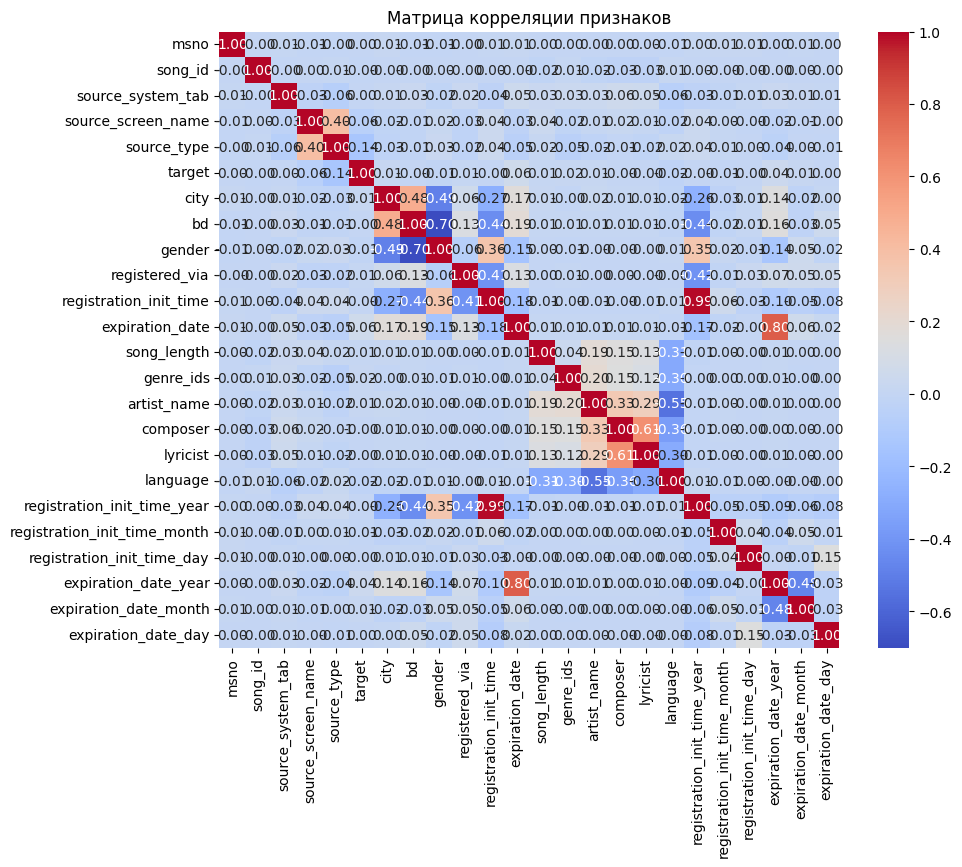

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции признаков')
plt.show()


# Моделирование

In [41]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bd, test_size = 0.95, random_state=0)
print(train_data.head(5))

                                            user_id            song_id  count
4789   +4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=  王力宏 (Leehom Wang)     10
10107  +AuBsDjMPVwlFIvrc3SmXXigYUTNVr0vAAqn5wO6JQc=    信樂團 (Shin Band)      1
45644  /2A361q3cuoEFZ0FoMEWj8SIVRJyPpHZQ5ni6Oud88M=        Chris Botti      4
42654  /+HERdUXd3fQeuGR4RKIYYMXZqTnT7boQnKKfyJXjCs=    四葉草 (Joyce Chu)      1
23034  +XjqLiiC+v9DAX620UE3O5OZaIdWvN6lOXB/XDFj1T0=          Popu Lady      3


In [144]:
class PopylarityRec():
    def __init__(self):
        self.popularity_recommendations = None

    def create(self, train_data, user_id, item_id):
        train_data_grouped = train_data.groupby(item_id).agg({user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns={user_id: 'score'}, inplace=True)
        train_data_sort = train_data_grouped.sort_values(['score', item_id], ascending=[0, 1])
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        self.popularity_recommendations = train_data_sort.head(10)

    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        user_recommendations['user_id'] = user_id

        cols = user_recommendations.columns.tolist()
        user_recommendations = user_recommendations[cols[-1:] + cols[:-1]]
        
        return user_recommendations
    

class ItemSimilarity():
    def __init__(self):
        self.cooc_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
     
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        return user_items

    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
        return item_users
    
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
        return all_items
    
    def construct_cooc_matrix(self, user_songs, all_songs):
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
        cooc_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
        for i in range(0,len(all_songs)):
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            for j in range(0,len(user_songs)):
                users_j = user_songs_users[j]
                users_intersection = users_i.intersection(users_j)
                if len(users_intersection) != 0:
                    users_union = users_i.union(users_j) 
                    cooc_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooc_matrix[j,i] = 0
                    
        return cooc_matrix

    
    #Используем матрицу совпадений, чтобы составить лучшие рекомендации
    def generate_top_recommendations(self, user, cooc_matrix, all_songs, user_songs):
        #Рассчитаем средневзвешенное значение оценок в матрице совпадений для всех пользовательских песен.
        user_sim_scores = cooc_matrix.sum(axis=0)/float(cooc_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()

        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)

        columns = ['user_id', 'song', 'score', 'rank']
        df = pandas.DataFrame(columns=columns)
        
        #Заполним dataframe 10 лучшими рекомендациями.
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1

        if df.shape[0] == 0:
            print("Recomendation broken.")
            return -1
        else:
            return df

        
    def recommend(self, user):
        user_songs = self.get_user_items(user)    
        #Получаем все уникальные элементы (песни) из обучающих данных.
        all_songs = self.get_all_items_train_data()
        
        #Строим матрицу совпадения
        cooc_matrix = self.construct_cooc_matrix(user_songs, all_songs)
        #Используем матрицу совпадений, чтобы дать рекомендации
        df_recommendations = self.generate_top_recommendations(user, cooc_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Получаем предметы, похожие на заданные
    def get_similar_items(self, item_list):
        user_songs = item_list
        #Получаем все уникальные элементы (песни) из обучающих данных.
        all_songs = self.get_all_items_train_data()
        #Строим матрицу совпадения
        cooc_matrix = self.construct_cooc_matrix(user_songs, all_songs)
        user = ""
        #Используем матрицу совпадений, чтобы дать рекомендации
        df_recommendations = self.generate_top_recommendations(user, cooc_matrix, all_songs, user_songs)
         
        return df_recommendations

In [145]:
model = PopylarityRec()
model.create(train_data, 'user_id', 'song_id')

In [146]:
train_data.head()

,user_id,song_id,count
4789,+4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=,王力宏 (Leehom Wang),10
10107,+AuBsDjMPVwlFIvrc3SmXXigYUTNVr0vAAqn5wO6JQc=,信樂團 (Shin Band),1
45644,/2A361q3cuoEFZ0FoMEWj8SIVRJyPpHZQ5ni6Oud88M=,Chris Botti,4
42654,/+HERdUXd3fQeuGR4RKIYYMXZqTnT7boQnKKfyJXjCs=,四葉草 (Joyce Chu),1
23034,+XjqLiiC+v9DAX620UE3O5OZaIdWvN6lOXB/XDFj1T0=,Popu Lady,3


In [147]:
id = df_members.iloc[1]['msno']
model.recommend(id)

,user_id,song_id,score,Rank
686,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,Various Artists,19,1.0
238,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,Eric 周興哲,17,2.0
129,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,CHARLIE PUTH,16,3.0
1042,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,田馥甄 (Hebe),16,4.0
756,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,五月天 (Mayday),14,5.0
1176,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,陳勢安 (Andrew Tan),14,6.0
986,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,楊丞琳 (Rainie Yang),13,7.0
17,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,A-Lin,12,8.0
263,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,G.E.M.鄧紫棋,12,9.0
442,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,Maroon 5,12,10.0


In [149]:
is_model = ItemSimilarity()
is_model.create(train_data, 'user_id', 'song_id')

In [150]:
user_id = "+4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA="
user_items = is_model.get_user_items(user_id)
print("Данные артистов использованные для обучения, пользователя: %s:" % user_id)
print(len(user_items))
for user_item in user_items:
    print(user_item)

Данные артистов использованные для обучения, пользователя: +4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=:
9
王力宏 (Leehom Wang)
DJ Snake & Lil Jon
陳勢安 (Andrew Tan)
陳曉東 (Daniel Chan)
Bii畢書盡+陳勢安+陳彥允+李玉璽
小男孩樂團 (Men Envy Children)
FS (Fuying & Sam)
吳克群 (Kenji Wu)
16個夏天 電視原聲帶


In [151]:
print("Его рекомендации:")
is_model.recommend(user_id)

Его рекомендации:


,user_id,song,score,rank
0,+4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=,AKDONG MUSICIAN (AKMU),0.064815,1
1,+4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=,高愷蔚 (Ape),0.056614,2
2,+4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=,DJ Quik,0.055556,3
3,+4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=,四個朋友(林正/鄭宇伶/劉佳銘/蘭馨),0.055556,4
4,+4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=,ASA,0.055556,5
5,+4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=,Aanysa| Snakehips,0.055556,6
6,+4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=,Brandy,0.055556,7
7,+4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=,Blackstreet,0.055556,8
8,+4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=,Xmas Hits Collective| Childrens Christmas Part...,0.055556,9
9,+4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=,10cm,0.055556,10
